<a href="https://colab.research.google.com/github/Jinnie506/Hamoye-Data-Science/blob/main/StageCquiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STAGE C: MACHINE LEARNING: CLASSIFICATION - MANAGING THE QUALITY METRIC OF GLOBAL ECOLOGICAL FOOTPRINT

In [74]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

In [75]:
#loading the dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [76]:
#dropping the 'stab' column as it will be represented by the 'stabf' column
df.drop('stab', axis=1, inplace=True)

In [77]:
X=df.drop('stabf',axis=1)
y=df['stabf']

In [78]:
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [79]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [80]:
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [81]:
##smote = SMOTE(random_state=1)
##x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

In [82]:
#Standard scaler
scaler = StandardScaler()
normalized_train_df = scaler.fit_transform(x_train)
normalized_train_df = pd.DataFrame(normalized_train_df, columns = x_train.columns)

normalized_test_df = scaler.transform(x_test)
normalized_test_df = pd.DataFrame(normalized_test_df, columns=x_test.columns)

**RANDOM** **FOREST** MODEL

In [83]:
forest = RandomForestClassifier(random_state=1)
forest.fit(normalized_train_df, y_train)
forest_pred = forest.predict(normalized_test_df)

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, forest_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9191    0.8778    0.8980       712
    unstable     0.9341    0.9573    0.9456      1288

    accuracy                         0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000



In [85]:
print('Accuracy : {0:.4f}'. format(accuracy_score(y_true = y_test, y_pred = forest_pred)))

Accuracy : 0.9290


In [86]:
f1 = f1_score(y_true=y_test, y_pred=forest_pred, pos_label='stable')
print( 'F1: {}' .format(round(f1* 100 ), 2 ))

F1: 90


**ExtraTreesClassifier**

In [87]:
tree = ExtraTreesClassifier(random_state=1)
tree.fit(normalized_train_df, y_train)
tree_pred = tree.predict(normalized_test_df)

In [88]:
#using the classifiation report for extra tree
from sklearn.metrics import classification_report
print(classification_report(y_test, tree_pred, zero_division=True, digits=4))

              precision    recall  f1-score   support

      stable     0.9410    0.8511    0.8938       712
    unstable     0.9218    0.9705    0.9455      1288

    accuracy                         0.9280      2000
   macro avg     0.9314    0.9108    0.9197      2000
weighted avg     0.9287    0.9280    0.9271      2000



In [89]:
print ('Accuracy_XTC : {0:.4f}'. format(accuracy_score(y_true = y_test, y_pred = tree_pred)))

Accuracy_XTC : 0.9280


In [90]:
f1 = f1_score(y_true=y_test, y_pred=tree_pred, pos_label='stable')
print( 'F1: {}' .format(round(f1* 100 ), 2 ))

F1: 89


**Extreme** **Gradient** **Boosting**(**XGB**)

In [91]:
ext = XGBClassifier(random_state=1)
ext.fit(normalized_train_df, y_train)
ext_pred = ext.predict(normalized_test_df)

In [92]:
#Classification report
print(classification_report(y_test, ext_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9206    0.8469    0.8822       712
    unstable     0.9190    0.9596    0.9389      1288

    accuracy                         0.9195      2000
   macro avg     0.9198    0.9033    0.9105      2000
weighted avg     0.9195    0.9195    0.9187      2000



In [93]:
print ('Accuracy_xgb : {0:.4f}'. format(accuracy_score(y_true = y_test, y_pred = ext_pred)))

Accuracy_xgb : 0.9195


In [94]:
f1 = f1_score(y_true=y_test, y_pred=ext_pred, pos_label='stable')
print( 'F1: {}' .format(round(f1* 100 ), 2 ))

F1: 88


**Light Gradient Boosting Model**

In [95]:
light = LGBMClassifier(random_state=1)
light.fit(normalized_train_df, y_train)
light_pred = light.predict(normalized_test_df)

In [96]:
#Classification report
print(classification_report(y_test, light_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9297    0.8919    0.9104       712
    unstable     0.9415    0.9627    0.9520      1288

    accuracy                         0.9375      2000
   macro avg     0.9356    0.9273    0.9312      2000
weighted avg     0.9373    0.9375    0.9372      2000



In [97]:
print ('Accuracy_lgb : {0:.4f}'. format(accuracy_score(y_true = y_test, y_pred = light_pred)))

Accuracy_lgb : 0.9375


In [98]:
f1 = f1_score(y_true=y_test, y_pred=light_pred, pos_label='stable')
print( 'F1: {}' .format(round(f1* 100 ), 2 ))

F1: 91


**RandomisedSearchCV**

In [99]:
#Hyperparameters

n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 
param_dict = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [100]:
#Randomised Search Cross Validation
classifier = ExtraTreesClassifier(random_state=1)
clf = RandomizedSearchCV(classifier, param_dict, cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1, random_state=1)
search_result = clf.fit(normalized_train_df, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [101]:
#checking for the best parameter for the model
search_result.best_params_

{'max_features': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [102]:
#experimenting with this parameter to test the model's performance
tuned_tree = ExtraTreesClassifier(n_estimators=1000, min_samples_split=2, 
                                 min_samples_leaf=8, max_features=None, random_state=1)
tuned_tree.fit(normalized_train_df, y_train)
tuned_tree_pred = tuned_tree.predict(normalized_test_df)

In [103]:
#classification report for this hyperparameter tuning
print(classification_report(y_test, tuned_tree_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9211    0.8694    0.8945       712
    unstable     0.9300    0.9589    0.9442      1288

    accuracy                         0.9270      2000
   macro avg     0.9256    0.9141    0.9193      2000
weighted avg     0.9268    0.9270    0.9265      2000



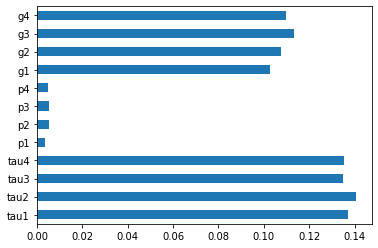

In [104]:
#plot graph of feature importance
feat_importance = pd.Series(tuned_tree.feature_importances_, index=X.columns)
feat_importance.plot(kind='barh')
plt.show()